## Preamble

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10

%matplotlib inline

## Meet the data

In [5]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
print("Keys of cancer_dataset: \n{}".format(cancer.keys()))

Keys of cancer_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [14]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [15]:
print("Target names:{}".format(cancer['target_names']))

Target names:['malignant' 'benign']


In [16]:
print("Feature names:\n{}".format(cancer['feature_names']))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
print("Type of data: {}".format(type(cancer['data'])))

Type of data: <class 'numpy.ndarray'>


In [18]:
print("Shape of data: {}".format(cancer['data'].shape))

Shape of data: (569, 30)


In [19]:
print("first five columns of data:\n{}".format(cancer['data'][:5]))

first five columns of data:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+

In [20]:
print("type of target: {}".format(type(cancer['target'])))

type of target: <class 'numpy.ndarray'>


In [22]:
print("shape of target: {}".format(cancer['target'].shape))

shape of target: (569,)


In [24]:
print("First 10 of target:\n{}".format(cancer['target'][:10]))

First 10 of target:
[0 0 0 0 0 0 0 0 0 0]


In [25]:
print("target names:{}".format(cancer['target_names']))

target names:['malignant' 'benign']


## Measuring Success: Training and Testing Data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'], cancer['target'], 
    stratify=cancer.target, random_state = 42)

In [8]:
print("X_train shape: {}".format(X_train.shape))

X_train shape: (426, 30)


In [32]:
print('y_train shape: {}'.format(y_train.shape))

y_train shape: (426,)


## First things first: look at your data

In [33]:
# create data frame from data in X_train
# lable the columns using the strings in cancer.feature_names

cancer_df = pd.DataFrame(X_train, columns = cancer.feature_names)

/anaconda/envs/ml/lib/python3.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


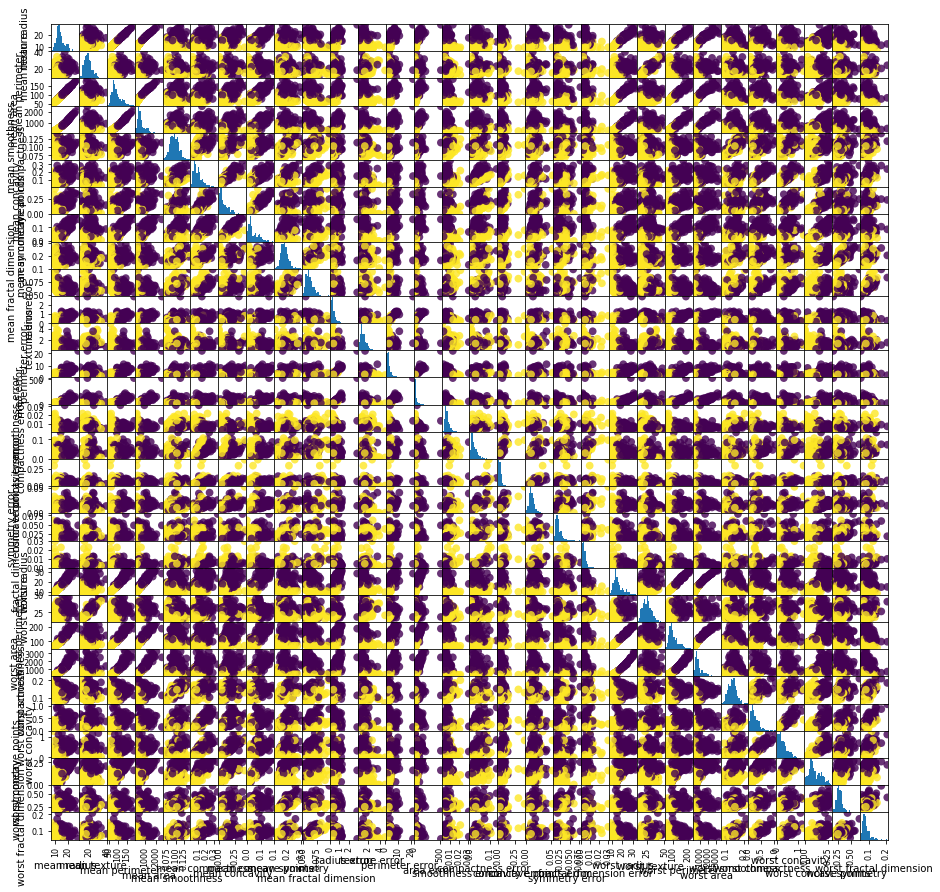

In [35]:
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(cancer_df, c=y_train,
                       figsize = (15, 15),
                       marker = 'o',
                       hist_kwds = {'bins': 20},
                       s = 60,
                       alpha = 0.8)

## Build a single tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [38]:
print("Accuracy on training set: {:.5f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 1.00000


In [39]:
print("Accuracy on training set: {:5f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.937063


## Pre-pruning the tree

In [11]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [12]:
print("Accuracy on training set: {:.5f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 0.98826


In [13]:
print("Accuracy on testing set: {:.5f}".format(tree.score(X_test, y_test)))

Accuracy on testing set: 0.95105


## Analyzing the decision tree

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ['malignant', 'benign'],
               feature_names = cancer.feature_names, impurity = False, filled = True)

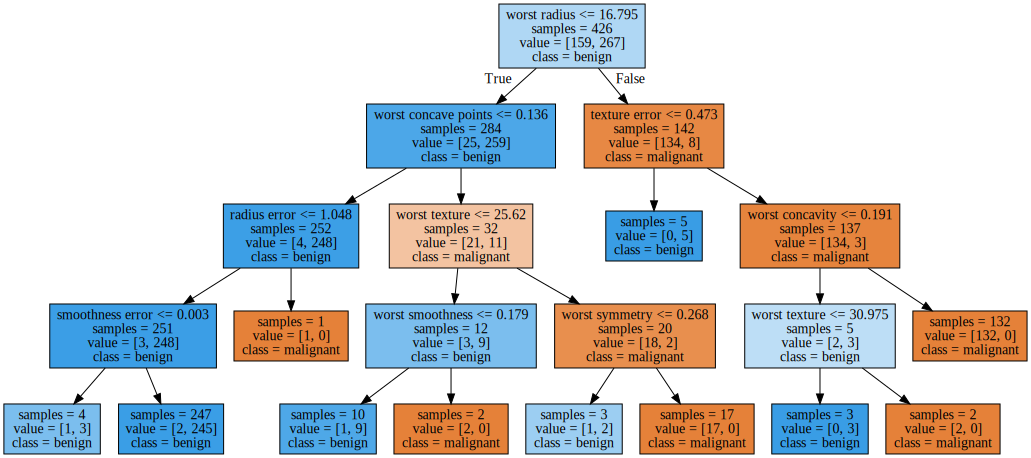

In [19]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Feature importance in trees

In [20]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [22]:
pd.DataFrame(tree.feature_importances_, index = cancer.feature_names)

0
mean radius              0.000000
mean texture             0.000000
mean perimeter           0.000000
mean area                0.000000
mean smoothness          0.000000
...                           ...
worst compactness        0.000000
worst concavity          0.018188
worst concave points     0.122113
worst symmetry           0.011885
worst fractal dimension  0.000000

[30 rows x 1 columns]

In [49]:
# visualize feature importance
import matplotlib as plt
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.pyplot.figure(figsize=(10,n_features/5))
    plt.pyplot.barh(range(n_features), model.feature_importances_, align = 'center', height = 0.5)
    plt.pyplot.yticks(np.arange(n_features), cancer.feature_names)
    plt.pyplot.xlabel("Feature importance")
    plt.pyplot.ylabel("Feature")

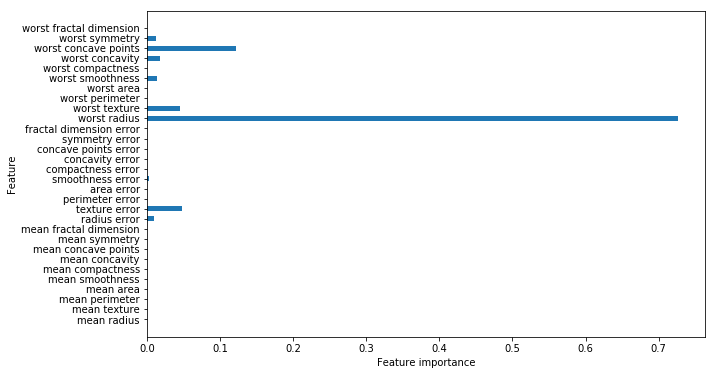

In [46]:
plot_feature_importances_cancer(tree)

## Tree-based regression

In [53]:
ram_prices = pd.read_csv("https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/ram_price.csv")

Text(0,0.5,'Price in $/Mbyte')

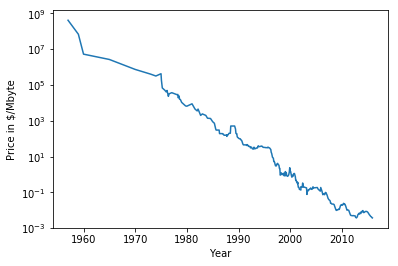

In [54]:
# logarithmic scale of the y-axis
plt.pyplot.semilogy(ram_prices.date, ram_prices.price)
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Price in $/Mbyte")

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target 
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)    

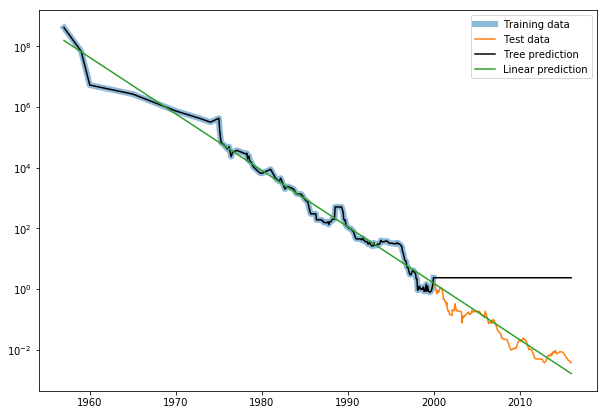

In [70]:
plt.pyplot.figure(figsize = (10, 7))
plt.pyplot.semilogy(data_train.date, data_train.price, label="Training data", linewidth = 6, alpha = 0.5)
plt.pyplot.semilogy(data_test.date, data_test.price, label="Test data")
plt.pyplot.semilogy(ram_prices.date, price_tree, label="Tree prediction", color = 'black')
plt.pyplot.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.pyplot.legend()

## Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier

/anaconda/envs/ml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/anaconda/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from sklearn.datasets import make_moons

In [5]:
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [9]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
c

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

In [36]:
forest = RandomForestClassifier(n_estimators=100, max_features=4,
                                random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
print("Accuracy on training set:{:.5f}".format(forest.score(X_train, y_train)))

Accuracy on training set:0.99765


In [38]:
print("Accuracy on testting set:{:5f}".format(forest.score(X_test, y_test)))

Accuracy on testting set:0.944056


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbrt = GradientBoostingClassifier(random_state = 0)

In [41]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [43]:
print("Accuracy on training set: {:.5f}".format(gbrt.score(X_train, y_train)))

Accuracy on training set: 1.00000


In [44]:
print("Accuracy on testting set: {:5f}".format(gbrt.score(X_test, y_test)))

Accuracy on testting set: 0.958042


In [51]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)

In [52]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [53]:
print("Accuracy on training set: {:3f}".format(gbrt.score(X_train, y_train)))

Accuracy on training set: 0.995305


In [54]:
print("Accuracy on testing set: {:3f}".format(gbrt.score(X_test, y_test)))

Accuracy on testing set: 0.965035


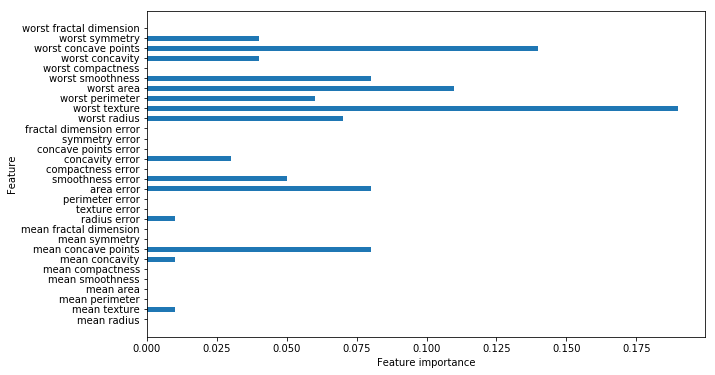

In [55]:
plot_feature_importances_cancer(gbrt)